<a href="https://colab.research.google.com/github/colawhite/article/blob/master/handle_imbalance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree, datasets
import graphviz 
import random
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

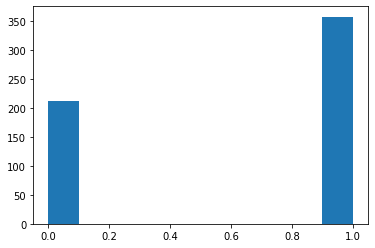

In [52]:
data = datasets.load_breast_cancer()
X, y = datasets.load_breast_cancer(return_X_y=True)
plt.hist(y)
X = pd.DataFrame(X)
X.columns = data.feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(random_state=0,min_samples_leaf=30)
clf = clf.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        53
           1       0.91      0.97      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.90      0.91       143
weighted avg       0.92      0.92      0.91       143



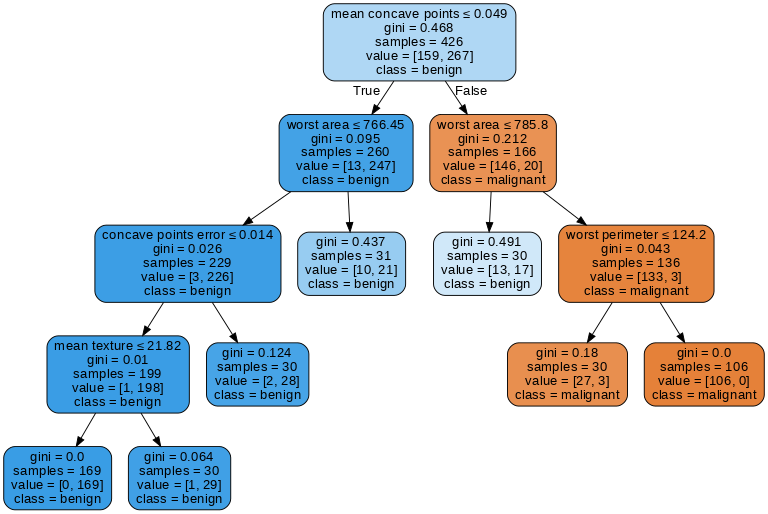

In [53]:
y_score = clf.predict(X_test)
print (classification_report(y_test,y_score))
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=data.feature_names,  
                      class_names=data.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.set_size('"8,8!"')
Image(graph.create_png())

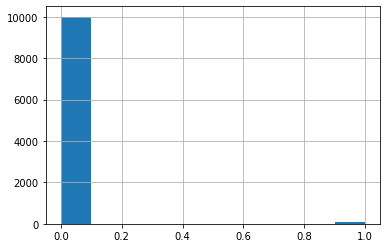

In [54]:
df = X
df['y'] = y
df0 = df[df.y==0]
df1 = df[df.y==1]

sample0 = df0.sample(n=10000,replace=True)
sample1 = df1.sample(n=100,replace=True)
imbalance = sample0.append(sample1)
imbalance['y'].hist()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(imbalance[data.feature_names], imbalance['y'], random_state=0)
clf = DecisionTreeClassifier(random_state=0,min_samples_leaf=30)
clf = clf.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2498
           1       1.00      0.44      0.62        27

    accuracy                           0.99      2525
   macro avg       1.00      0.72      0.81      2525
weighted avg       0.99      0.99      0.99      2525



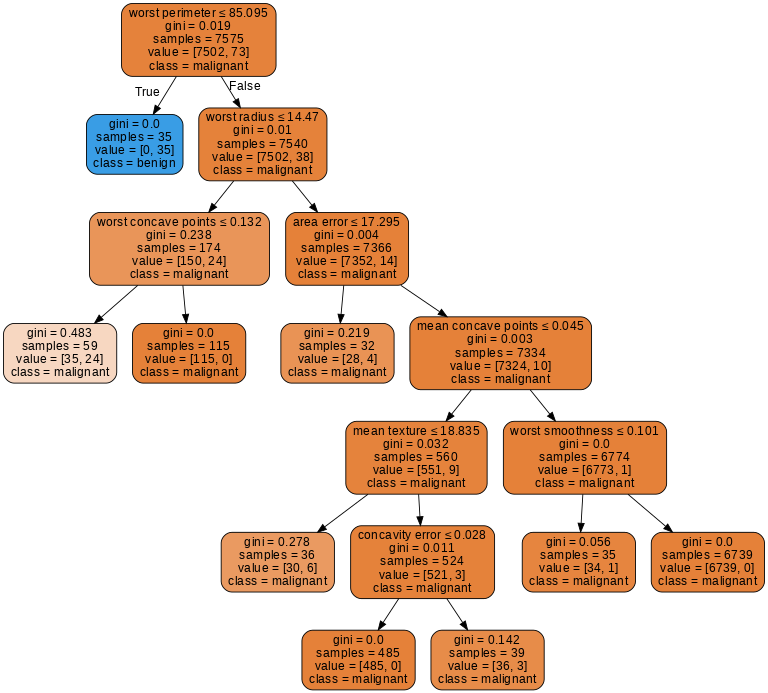

In [56]:
y_score = clf.predict(X_test)
print (classification_report(y_test,y_score))
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=data.feature_names,  
                      class_names=data.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.set_size('"8,8!"')
Image(graph.create_png())

Address imbalance data with class weight

In [0]:
clf = DecisionTreeClassifier(random_state=0,min_samples_leaf=30,class_weight='balanced')
clf = clf.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2498
           1       0.49      0.96      0.65        27

    accuracy                           0.99      2525
   macro avg       0.75      0.98      0.82      2525
weighted avg       0.99      0.99      0.99      2525



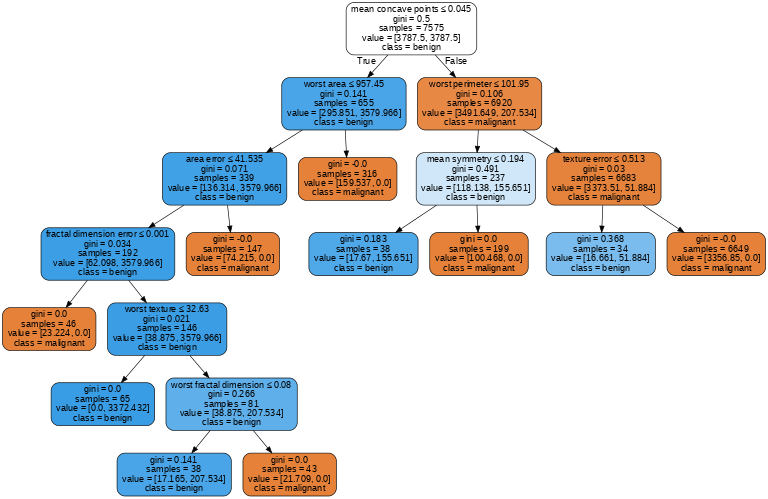

In [58]:
y_score = clf.predict(X_test)
print (classification_report(y_test,y_score))
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=data.feature_names,  
                      class_names=data.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.set_size('"8,8!"')
Image(graph.create_png())

Address imbalance data with upsampling

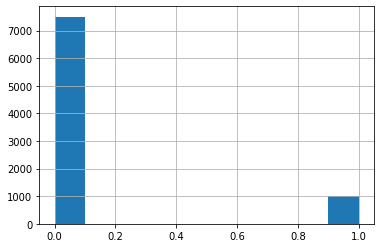

In [59]:
df = X_train
df['y'] = y_train
df0 = df[df.y==0]
df1 = df[df.y==1]
sample1 = df1.sample(n=1000,replace=True)
balance = df0.append(sample1)
balance['y'].hist()

In [0]:
clf = DecisionTreeClassifier(random_state=0,min_samples_leaf=30)
X_train = balance[data.feature_names]
y_train = balance['y']
clf = clf.fit(X_train, y_train)

(array([2498.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          27.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2498
           1       1.00      0.85      0.92        27

    accuracy                           1.00      2525
   macro avg       1.00      0.93      0.96      2525
weighted avg       1.00      1.00      1.00      2525



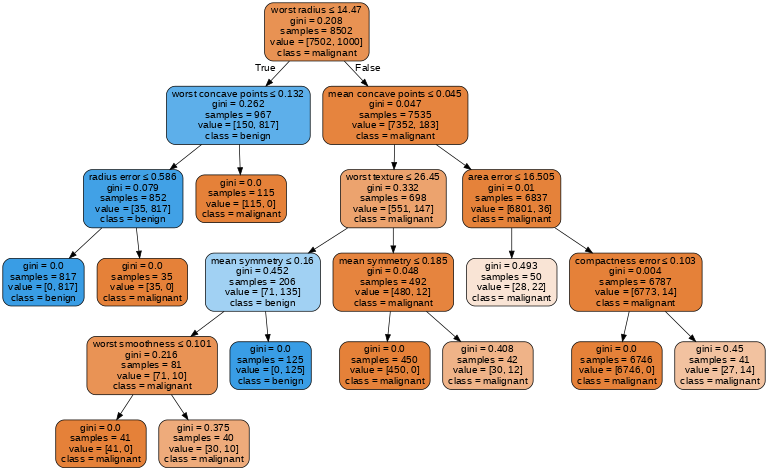

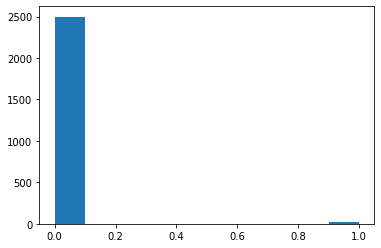

In [61]:
y_score = clf.predict(X_test)
plt.hist(y_test)
print (classification_report(y_test,y_score))
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=data.feature_names,  
                      class_names=data.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.set_size('"8,8!"')
Image(graph.create_png())